# **Data Preprocessing using Pandas : Real Estate Price Prediction**

## **Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib 

## **Data**

In [2]:
df = pd.read_csv('Bangalore  house data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

## **Exploring Dataset**

In [4]:
df.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df.groupby('location')['location'].count()

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1305, dtype: int64

In [6]:
df.groupby('size')['size'].count()

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

In [7]:
df.groupby('bath')['bath'].count()

bath
1.0      788
2.0     6908
3.0     3286
4.0     1226
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
11.0       3
12.0       7
13.0       3
14.0       1
15.0       1
16.0       2
18.0       1
27.0       1
40.0       1
Name: bath, dtype: int64

In [8]:
df.groupby('balcony')['balcony'].count()

balcony
0.0    1029
1.0    4897
2.0    5113
3.0    1672
Name: balcony, dtype: int64

## **Data Cleaning**

**Dropping peripheral columns for simplicity**

In [9]:
df_1 = df.drop(['availability', 'society'], axis = 1)
df_1.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


**Handling NaN values**

In [10]:
df_1.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [11]:
df_2 = df_1.dropna()
df_2.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [12]:
df_2.shape

(12710, 7)

**Handling analogous values** <br>
Here, 2 BHK and 2 Bedroom are essentially the same thing...

In [13]:
df_2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [14]:
# creating a new column for bhk count
df_2['bhk'] = df_2['size'].apply(lambda x : int(x.split(' ')[0]))
df_2.head()

<ipython-input-14-d88cf7d64bca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['bhk'] = df_2['size'].apply(lambda x : int(x.split(' ')[0]))


,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [15]:
df_2['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [16]:
df_3 = df_2.drop(['size'], axis = 1)
df_3.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


**Handling non numerical and range values**

In [17]:
df_3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def isFloat(x):
  try:
    float(x)
  except:
    return False
  return True

In [19]:
# returning values other than Float
df_3[~df_3['total_sqft'].apply(isFloat)].head(15)

,area_type,location,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
661,Super built-up Area,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4
772,Super built-up Area,Banashankari Stage VI,1160 - 1195,2.0,0.0,59.935,2


In [20]:
# funtion to return the avg of a range
def sqft_to_float(x):
  token = x.split('-')
  if len(token) == 2:
    return (float(token[0]) + float(token[1]))/2
  else:
    try:
      return float(x)
    except:
      return None

In [21]:
df_3['total_sqft'] = df_3['total_sqft'].apply(sqft_to_float)

In [22]:
df_3.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
total_sqft                  2475.0
bath                           4.0
balcony                        0.0
price                        186.0
bhk                              4
Name: 30, dtype: object

In [23]:
df_3.loc[410]

area_type     Super built-up  Area
location                   Kengeri
total_sqft                     NaN
bath                           1.0
balcony                        0.0
price                         18.5
bhk                              1
Name: 410, dtype: object

In [24]:
# other than range values are set to NaN now
df_3.isnull().sum()

area_type      0
location       0
total_sqft    42
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [25]:
# dropping the Nan values
df_4 = df_3.dropna()
df_4.isnull().sum()

area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

## **Feature Engineering**

**Creating new feature : price per sqft** <br>
it'll eventually help us to detect outliers

In [26]:
df_4['price_per_sqft'] = df_4['price']*100000 / df_4['total_sqft'] # as price is in lacs
df_4.head() 

<ipython-input-26-632ddffbbb84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['price_per_sqft'] = df_4['price']*100000 / df_4['total_sqft'] # as price is in lacs


,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


**Compressing location entities**

In [27]:
len(df_4['location'].unique())

1259

In [28]:
df_4.location = df_4['location'].apply(lambda x : x.strip()) # removeing any leading and trailing space or characters
location = df_4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location

<ipython-input-28-5e22b27545dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4.location = df_4['location'].apply(lambda x : x.strip()) # removeing any leading and trailing space or characters


location
Whitefield              514
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          259
Thanisandra             233
                       ... 
1 Giri Nagar              1
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
whitefiled                1
Name: location, Length: 1248, dtype: int64

In [29]:
# listing all the locations where entities are less than 50
location = location[location<50]
location

location
Bhoganhalli             49
HSR Layout              49
Mysore Road             48
Gottigere               48
Hulimavu                48
                        ..
1 Giri Nagar             1
Kanakapura  Rod          1
Kanakapura Main Road     1
Kanakapura Road          1
whitefiled               1
Name: location, Length: 1198, dtype: int64

In [30]:
# categorizing the under-50 locations as other
df_4['location'] = df_4['location'].apply(lambda x : 'other' if x in location else x)

<ipython-input-30-3df456d51e12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['location'] = df_4['location'].apply(lambda x : 'other' if x in location else x)


In [31]:
len(df_4['location'].unique())

51

## **Outlier Removal**

**Asuuming standard sqft per room : 300 sqft**

In [32]:
df_4[(df_4['total_sqft']/df_4['bhk'] < 300)]

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Plot Area,other,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,other,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,other,500.0,3.0,2.0,100.0,3,20000.000000
78,Built-up Area,other,460.0,1.0,0.0,22.0,2,4782.608696
89,Plot Area,Rajaji Nagar,710.0,6.0,3.0,160.0,6,22535.211268
...,...,...,...,...,...,...,...,...
13219,Plot Area,other,1590.0,9.0,3.0,132.0,7,8301.886792
13221,Plot Area,other,1178.0,9.0,1.0,75.0,9,6366.723260
13281,Plot Area,other,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Plot Area,other,774.0,5.0,3.0,70.0,5,9043.927649


In [33]:
# disocounting all the values where sqft per room is less than 300
df_5 = df_4[~(df_4['total_sqft']/df_4['bhk'] < 300)]

In [34]:
df_5.shape

(12013, 8)

**Removing extreme cases of price per sqft**

In [35]:
df_5.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
# removing all the entities where price_per_sqft < (mean-std) and (mean+std) > price_per_std

def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf['price_per_sqft'])
    sd = np.std(subdf['price_per_sqft'])
    reduce_df = subdf[(subdf['price_per_sqft'] >= (m-sd)) & (subdf['price_per_sqft'] <= (m+sd))]
    df_out = pd.concat([df_out, reduce_df], ignore_index = True)
  return df_out

In [37]:
df_6 = remove_pps_outliers(df_5)
df_6.shape

(10338, 8)

**Remove cases where 2 bhk price > 3 bhk** <br>
it's patent that 2 bhk price will be less than 3 bhk, normally.

In [38]:
def plot_bhk_vs_price(df, location):
  bhk2 = df[(df['location']==location) & (df['bhk']==2)]
  bhk3 = df[(df['location']==location) & (df['bhk']==3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bhk2['total_sqft'],bhk2['price'], color='blue', label='2 bhk', s=50)
  plt.scatter(bhk3['total_sqft'], bhk3['price'], marker='+', color='red', label='3 bhk', s=50)
  plt.xlabel('Total Sqft')
  plt.ylabel('Price')
  plt.title(location)
  plt.legend()

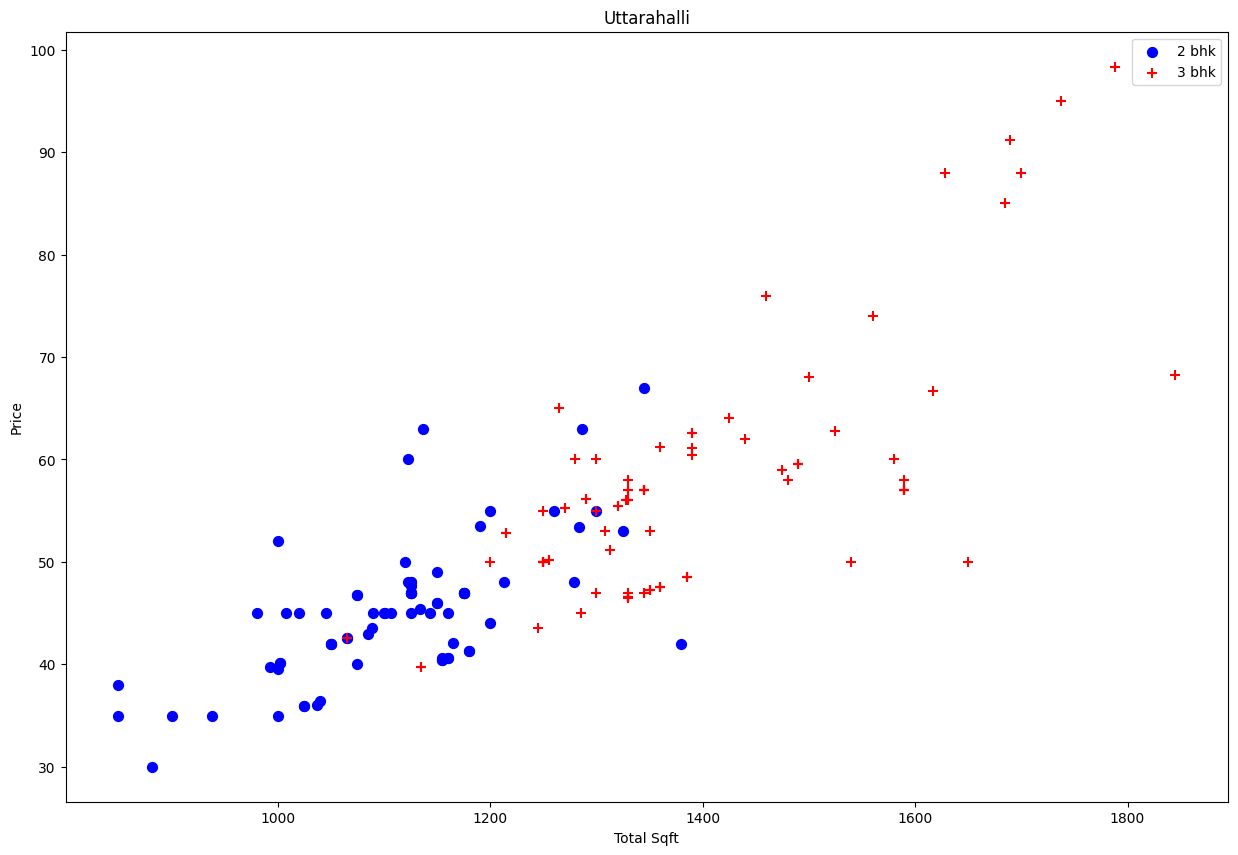

In [39]:
plot_bhk_vs_price(df_6, 'Uttarahalli')

In [40]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [41]:
df_7 = remove_bhk_outliers(df_6)
df_7.shape

(6210, 8)

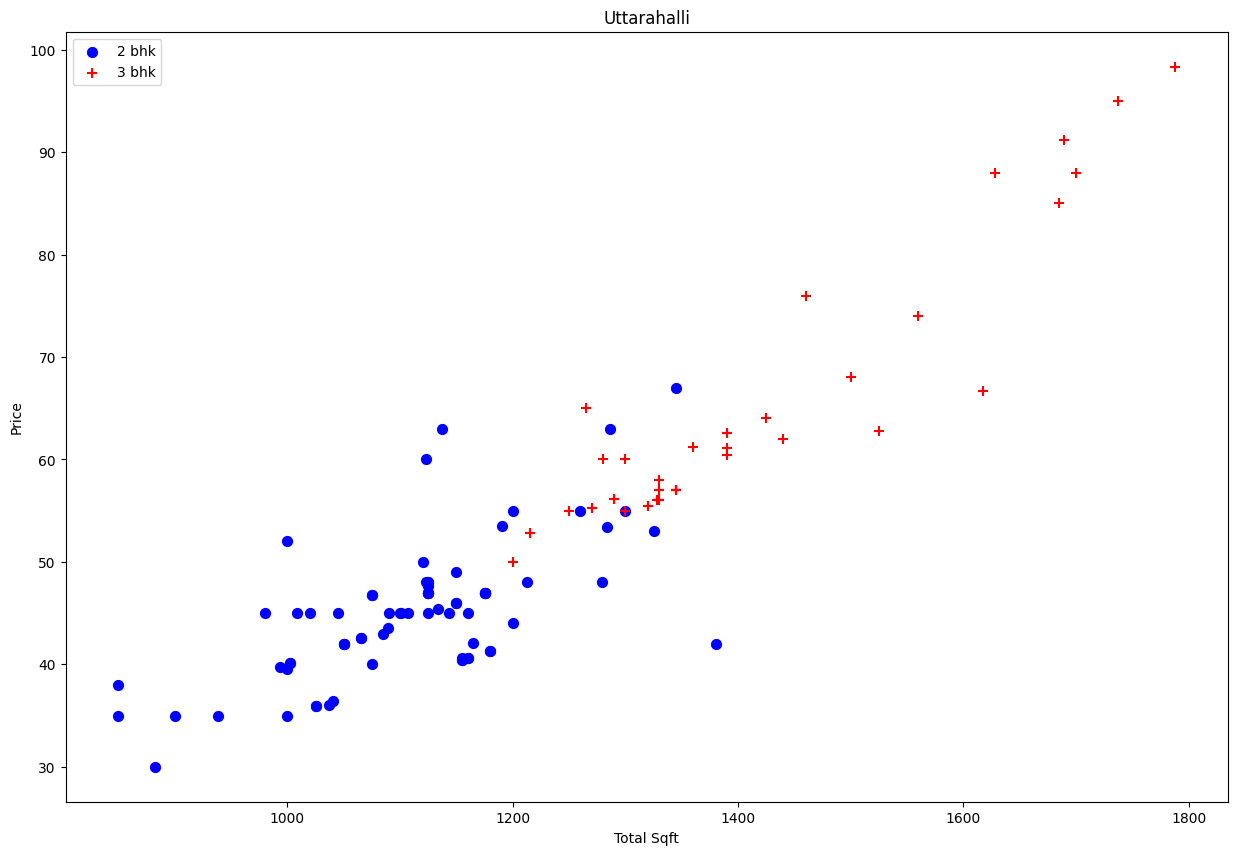

In [42]:
plot_bhk_vs_price(df_7, 'Uttarahalli')

Text(0, 0.5, 'Count')

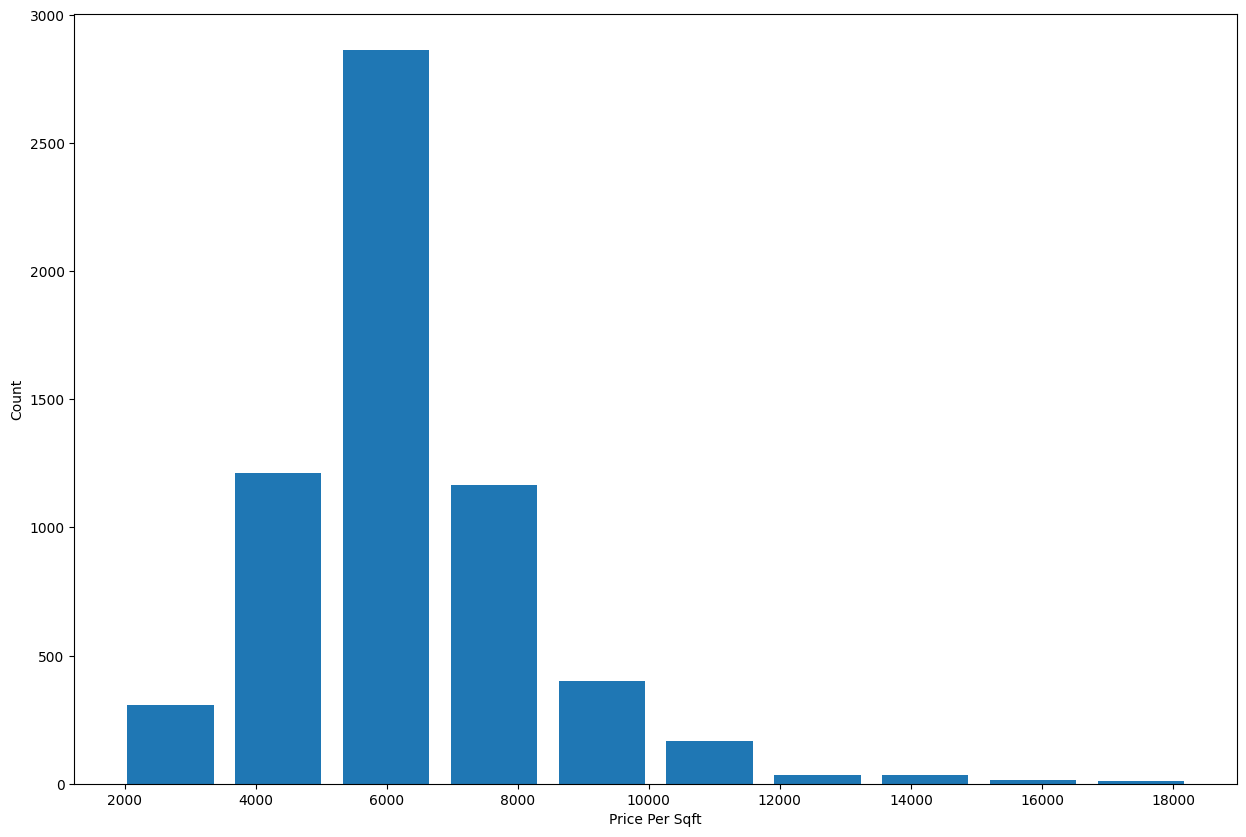

In [43]:
plt.hist(df_7.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Sqft")
plt.ylabel('Count')

**Handling Bath outliear values**

In [44]:
df_7.bath.unique()

array([ 2.,  3.,  4.,  1.,  5.,  6.,  9.,  7.,  8., 13., 10.])

In [45]:
df_7[df_7.bath > 10]

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
8855,Super built-up Area,other,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

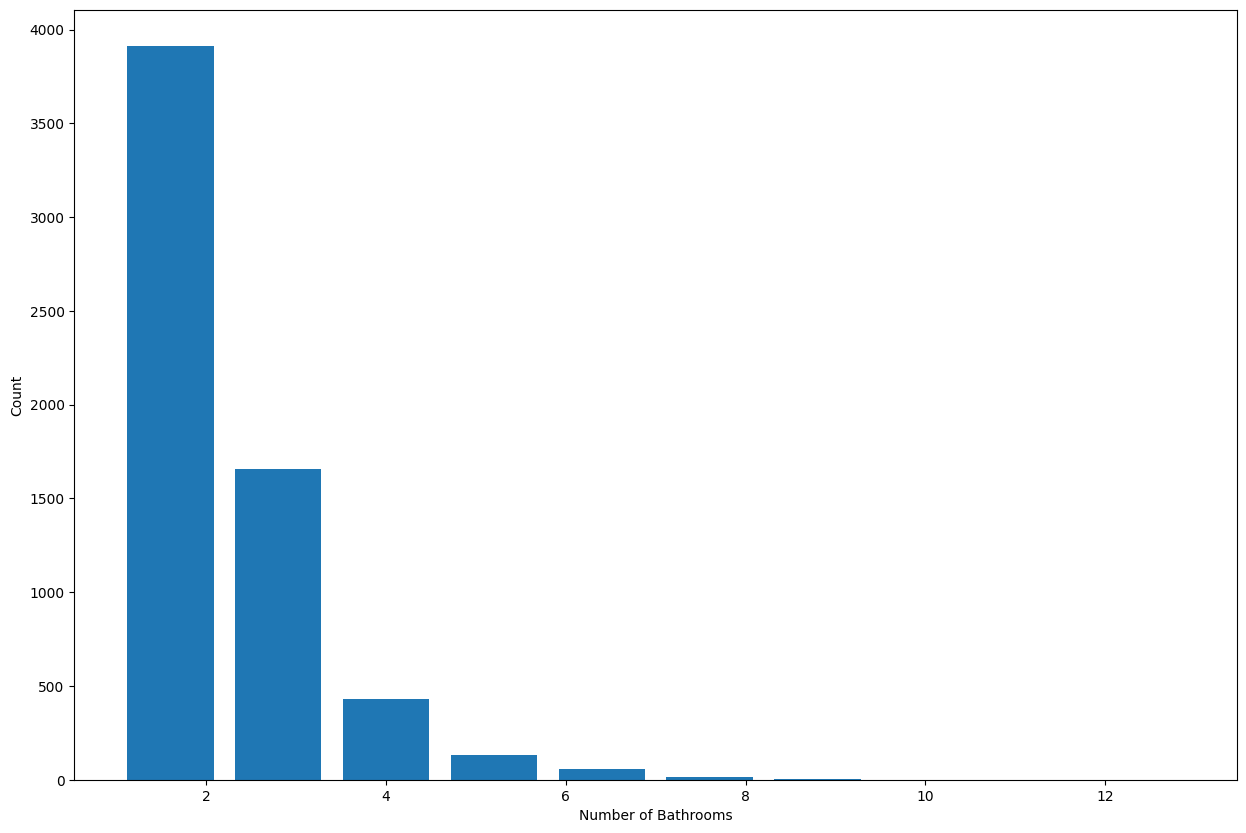

In [46]:
plt.hist(df_7.bath, rwidth=0.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

In [47]:
df_7[df_7.bath > df_7.bhk+2]

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
3541,Super built-up Area,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
5697,Super built-up Area,other,11338.0,9.0,1.0,1000.0,6,8819.897689


In [48]:
# removing such entities where bath > bhk+2
df_8 = df_7[df_7.bath < df_7.bhk+2]
df_8.shape

(6154, 8)

**Handling Balcony Outlier values**
<br>
seems no outlier exists in this column....

In [49]:
df_7.balcony.unique()

array([2., 1., 0., 3.])

**As outlier Removal is completed, *price_per_sqft* column is no longer needed.**

In [50]:
df_9 = df_8.drop('price_per_sqft', axis=1)
df_9.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Built-up Area,7th Phase JP Nagar,1080.0,2.0,2.0,72.0,2
1,Super built-up Area,7th Phase JP Nagar,1270.0,2.0,2.0,93.0,2
2,Built-up Area,7th Phase JP Nagar,1420.0,2.0,1.0,100.0,3
3,Built-up Area,7th Phase JP Nagar,1850.0,3.0,1.0,150.0,3
4,Built-up Area,7th Phase JP Nagar,1245.0,2.0,1.0,94.0,2


In [51]:
df_9.shape

(6154, 7)

## **One Hot Encoding**


In [52]:
df_10 = pd.get_dummies(df_9, prefix=['area_type', 'location'], drop_first=True)
df_10.head()

,total_sqft,bath,balcony,price,bhk,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_8th Phase JP Nagar,location_Akshaya Nagar,...,location_Sarjapur Road,location_TC Palaya,location_Thanisandra,location_Thigalarapalya,location_Uttarahalli,location_Varthur,location_Whitefield,location_Yelahanka,location_Yeshwanthpur,location_other
0,1080.0,2.0,2.0,72.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1270.0,2.0,2.0,93.0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1420.0,2.0,1.0,100.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1850.0,3.0,1.0,150.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1245.0,2.0,1.0,94.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
print(df_10.columns)

Index(['total_sqft', 'bath', 'balcony', 'price', 'bhk',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'location_8th Phase JP Nagar',
       'location_Akshaya Nagar', 'location_Banashankari',
       'location_Bannerghatta Road', 'location_Begur Road',
       'location_Bellandur', 'location_Bisuvanahalli', 'location_Budigere',
       'location_Chandapura', 'location_Electronic City',
       'location_Electronic City Phase II',
       'location_Electronics City Phase 1', 'location_Haralur Road',
       'location_Harlur', 'location_Hebbal', 'location_Hennur',
       'location_Hennur Road', 'location_Hoodi', 'location_Hormavu',
       'location_Hosa Road', 'location_JP Nagar', 'location_Jakkur',
       'location_Jalahalli', 'location_KR Puram', 'location_Kaggadasapura',
       'location_Kanakpura Road', 'location_Kasavanhalli', 'location_Kengeri',
       'location_Koramangala', 'location_Kothanur', 'location_Malleshwaram',
       'location

## **Model Building**

In [54]:
X = df_10.drop(['price'], axis=1)
y = df_10.price

In [55]:
X.shape

(6154, 57)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
regressor.score(X_test, y_test)

0.8202985849861038

### **Cross Validation**

In [58]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.86563933, 0.85938992, 0.88122897, 0.87755862, 0.87791746])